# Practical -8 : Visualize co-occurrence network from Amazon product reviews using NetworkX.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/amazon_reviews.csv', engine='python', on_bad_lines='skip')
print(df.columns)

Index(['userName', 'verified', 'itemName', 'description', 'image', 'brand',
       'feature', 'category', 'price', 'rating', 'reviewTime', 'summary',
       'reviewText', 'vote'],
      dtype='object')


In [ ]:
# Ensure all itemNames are strings
df['itemName'] = df['itemName'].astype(str)

In [ ]:
# Group by user
user_products = df.groupby('userName')['itemName'].apply(set)

# Build co-occurrence dictionary
from itertools import combinations
from collections import defaultdict

co_occurrence = defaultdict(int)

for products in user_products:
    for pair in combinations(products, 2):
        pair = tuple(sorted(pair))  # consistent ordering
        co_occurrence[pair] += 1


In [ ]:
import networkx as nx

G = nx.Graph()

# Add co-occurring product pairs as edges with weights
for (item1, item2), weight in co_occurrence.items():
    if weight >= 2:  # filter weak connections
        G.add_edge(item1, item2, weight=weight)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 1640 nodes and 4464 edges.


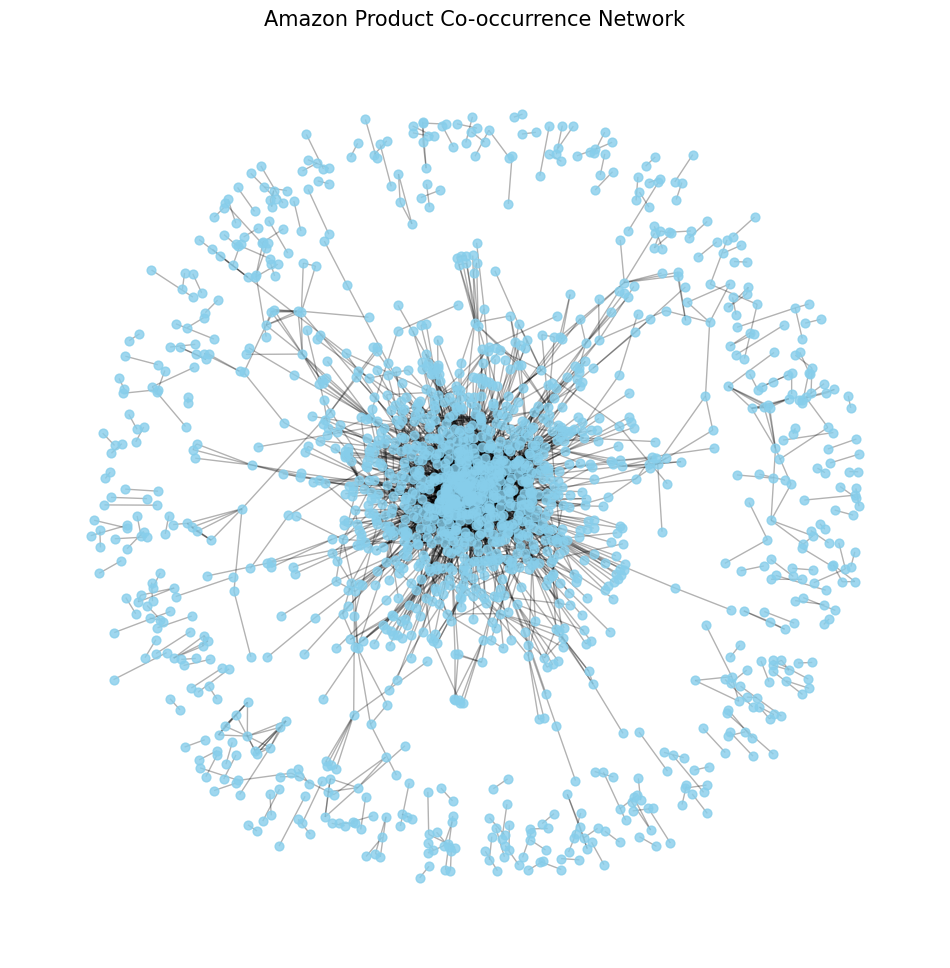

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=40, node_color='skyblue', alpha=0.8)

# Draw edges with weights
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Optional: Draw product labels (commented out for clarity)
# nx.draw_networkx_labels(G, pos, font_size=6)

plt.title("Amazon Product Co-occurrence Network", fontsize=15)
plt.axis('off')
plt.show()


In [ ]:
degree_centrality = nx.degree_centrality(G)

top_products = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 central products (most co-reviewed):")
for product, score in top_products:
    print(f"{product} - Centrality: {score:.4f}")

Top 10 central products (most co-reviewed):
KONG Wild Knots Bear Dog Toy, Colors Vary - Centrality: 0.0653
Bergan Turbo Scratcher Cat Toy, Colors may vary - Centrality: 0.0561
Zuke's Mini Naturals Dog Treats - Centrality: 0.0482
Outward Hound Hide-A-Squirrel Puzzle Plush Squeaking Toys Dogs - Centrality: 0.0458
Celestial Seasonings Tension Tamer Tea, 20 ct - Centrality: 0.0415
IPRIMIO Cat Litter Scooper with Deep Shovel - Non Stick Plated Aluminum Scoop - Designed by Cat Owners - Patented Sifter with Holder - Super Solid Handle - Black - Centrality: 0.0378
KONG Classic Dog Toy with Your Choice of Dog Treat (Combo Bundle). - Centrality: 0.0378
Outward Hound Fun Feeder Slow Feed Interactive Bloat Stop Dog Bowl - Centrality: 0.0348
Milk-Bone Flavor Snacks Dog Treats - Centrality: 0.0336
MidWest Deluxe Bolster Pet Bed for Dogs &amp; Cats - Centrality: 0.0329


In [ ]:
from networkx.algorithms import community

# Use greedy modularity community detection
communities = community.greedy_modularity_communities(G)

# Display number of communities and size of first few
print(f"Found {len(communities)} communities.")
print("Sizes of first 3 communities:", [len(c) for c in list(communities)[:3]])


Found 286 communities.
Sizes of first 3 communities: [270, 190, 153]
